# Esercitazione di Laboratorio n. 2

Funzione densità di probabilità: $\displaystyle p(E;B,T) = \frac{2}{\sqrt{\pi}} \; \sqrt{\frac{E-B}{T}} \; \frac{e^{-\dfrac{E-B}{T}}}{T}$

Moda: $\displaystyle E_{max} = B + \frac{1}{2}T$

Media: $\displaystyle \langle E \rangle = \mu(B,T) = B + \frac{3}{2}T$

## Parte II

La particella attraversa successivamente un assorbitore passivo da cui consegue una perdita di energia comunemente denominata "stopping power" (perdita di energia per unità di lunghezza del percorso). Lo stopping power si misura tipicamente in $MeV \; cm^2/mg$. Un modello per il suo calcolo è dato dall'espressione

$\displaystyle \large -\frac{d\, E(x)}{dx}=1.327 \; \frac{f(Z_2)}{A_2} \; \bigg\{ 4.7622\; \Big[f(Z_1) \Big]^{5/3} + \; f(Z_1) \bigg\} \; v$

$\displaystyle \large f(Z)=\begin{cases}0.28\;\; Z^{2/3} : Z<45 \\ \\ Z^{1/3} \;\;\;\;\;\;\;\;\;\ : Z>45 \end{cases}$

Dove $A_{1,2},\; Z_{1,2}$ sono i numeri di massa e i numeri atomici dello ione e del mezzo, rispettivamente, e $v$ la velocità dello ione in unità di $10^8 \; cm/ns$ a cui la perdita di energia è calcolata.

Dato lo spettro iniziale delle particelle trovato al passo precedente, determinare lo spettro in energia delle particelle emergenti da un assorbitore di alluminio nell'intervallo di energia tra $1$ e $10\; MeV$.

Usare che $v = 0,98 \cdot \sqrt{\frac{2E}{A_1}}$

# 

Posto $\displaystyle 1.327 \; \frac{f(Z_2)}{A_2} \; \bigg\{ 4.7622\; \Big[f(Z_1) \Big]^{5/3} + \; f(Z_1) \bigg\} \equiv \alpha(Z_1,Z_2,A_2)$ risulta, in modulo, $\displaystyle |dE| = \alpha \; v \; dx = \alpha \; 0.98 \; \sqrt{\frac{2}{A_1}} \; dx \; \sqrt{E}$. Se ora poniamo $\displaystyle \beta \equiv \beta(A_1,A_2,Z_1,Z_2) = 0.98 \; \alpha \; \sqrt{\frac{2}{A_1}} \; dx$ otteniamo

$\displaystyle |dE| = \beta \sqrt{E}$; $\beta$ non dipende da $E$, è proporzionale allo spessore $dx$ del rivelatore e ha le dimensioni di un'energia elevata alla $1/2$. Lo spettro delle energie iniziali $E$ è sottoposto quindi alla trasformazione

$\displaystyle \fbox{$ E_{fin} \equiv \varphi(E) = E - \beta \sqrt E $}$

dove $E$ è distribuita secondo la maxwelliana $\displaystyle p(E)=\frac{2}{\sqrt{\pi}\; T} \sqrt{\frac{E-B}{T}}\; e^{-\frac{E-B}{T}}$. Segue una rappresentazione di $\varphi(E)$:

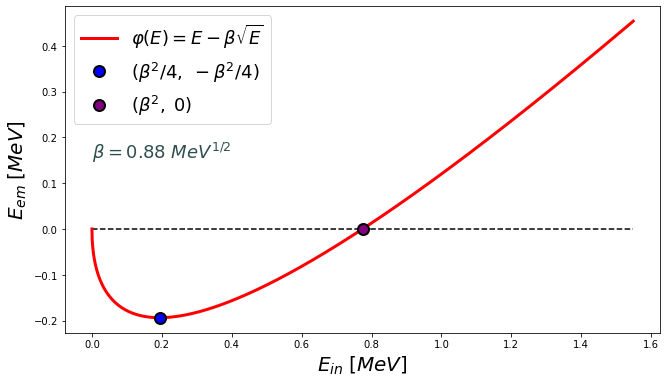

In [1]:
import matplotlib.pyplot as plt
from numpy import linspace, sqrt
beta = 0.88

E_in = linspace(0, 2*beta**2, 2000)
E_em = E_in - beta*sqrt(E_in)

plt.figure(figsize=(10.67, 6))
plt.text(s = r'$\beta =$' + str(beta)+r' $MeV^{1/2}$', x = 0, y = beta**2/5, size = 18, c = 'darkslategrey')
plt.plot([0,2*beta**2], [0,0], '--k')
plt.plot(E_in, E_em, 'r', lw = 3, label =r'$\varphi (E) = E - \beta \sqrt{E}$')
plt.plot([beta**2/4], [-beta**2/4], 'o b', mec='k', ms = 11, mew = 2, label=r'$(\beta^2/4, \; -\beta^2/4)$')
plt.plot([beta**2], [0], 'o',  c='purple', mec='k', ms = 11, mew = 2, label=r'$(\beta^2, \; 0)$')
plt.xlabel(r'$E_{in} \; [MeV]$', size = 20)
plt.ylabel(r'$E_{em} \; [MeV]$', size = 20)
plt.legend(fontsize=18)
plt.show()

### Analisi Teorica

Nel prosieguo denoteremo con $E$ la v.c. dell'energia iniziale; con $p(E)$ la sua p.d.f. (una maxwelliana di parametri $B,T$); con $y$, $\varphi(E)$ o $E_{em}$ la v.c. dell'energia emergente e con $P(y)$ la sua p.d.f.

Il grafico evidenzia che $\varphi$ non è invertibile: essa è decrescente per $E \in (0, \beta^2/4)$ e crescente per $E \in (\beta^2/4,\infty)$ (come potrebbe mostrare anche lo studio della derivata); il minimo assoluto è il punto $(\beta^2/4, \; \varphi(\beta^2/4)) = (\beta^2/4, -\beta^2/4)$. Ciò comporta che alla funzione di probabilità finale $P(y)$ concorrono contributi diversi a seconda dell'intervallo delle $y$ analizzato. Intanto, $\varphi$ è separatamente invertibile nei due intervalli di monotonia. Definiamo quindi

$\displaystyle \varphi_1(E) \equiv \begin{cases}E - \beta \sqrt{E} \\ \\ 0 \leqslant E \leqslant \beta^2/4 \end{cases} \\ \\
 \displaystyle \varphi_2(E) \equiv \begin{cases}E - \beta \sqrt{E} \\ \\ \beta^2/4 \leqslant E < \infty  \end{cases}$
 
Invertendo le due funzioni nei rispettivi domini ricaviamo

$\displaystyle \eta_1(y) \equiv \varphi_1^{-1}(y) = \begin{cases} \displaystyle \frac{\beta^2}{4} \left(1 - \sqrt{1 + 4\frac{y}{\beta^2}} \right)^2 \\ \\ \displaystyle -\frac{\beta^2}{4} \leqslant y \leqslant 0 \end{cases}$

$\displaystyle \eta_2(y) \equiv \varphi_2^{-1}(y) = \begin{cases} \displaystyle \frac{\beta^2}{4} \left(1 + \sqrt{1 + 4\frac{y}{\beta^2}} \right)^2 \\ \\ \displaystyle -\frac{\beta^2}{4} \leqslant y < \infty \end{cases}$

Il dominio di $y=E_{em}$ è quindi $(-\beta^2/4, \infty)$. Notiamo che per $-\beta^2/4 \leqslant y \leqslant 0$ alla probabilità di $y$ contribuiscono entrambi i rami $\varphi_1,\varphi_2$; per $y > 0$ contribuisce solo $\varphi_2$. Le derivate di $\eta_{1,2}$ sono

$\displaystyle \eta_1'(y) = 1 - \frac{1}{\sqrt{1+4 \frac{y}{\beta^2}}} \;\;\;\;\, : -\beta^2/4 < y \leqslant 0 \\
\displaystyle \eta_2'(y) = 1 + \frac{1}{\sqrt{1+4 \frac{y}{\beta^2}}} \;\;\;\;\, : -\beta^2/4 < y < \infty $

Si nota che, nei rispettivi domini, $\eta_1'(y)<0, \; \eta_2'(y)>0 \;\; \Rightarrow \;\; |\eta_1'(y)|=-\eta_1'(y)$. Ciò è in accordo con le monotonie di $\varphi_{1,2}$. Dalla legge di trasformazione delle v.c., ricaviamo che la densità di probabilità di $y$ è

$\displaystyle \fbox{$ P(y) = \begin{cases} p(\eta_2(y)) \; \eta_2'(y) - p(\eta_1(y)) \;\; \eta_1'(y): -\beta^2/4 < y \leqslant 0 \\ \\ p(\eta_2(y) \; \eta_2'(y) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\, : y \geqslant 0 \end{cases} $}$

Le energie incidenti sono per costruzione maggiori di $B$. Se $B>\beta^2/4$ allora tutte le $y$ saranno maggiori di $\varphi(\beta^2/4) = -\beta^2/4$ e, in particolare, il lower bound del campione $\{y\}$ sarà proprio $\varphi(B)$. Se invece $B \leqslant \beta^2/4$ il dominio di $\{y\}$ sarà proprio $y \geqslant -\beta^2/4$ (si immagini di restringere il grafico di $\varphi$ al solo intervallo $E > B$ e di verificare come cambia l'immagine della funzione al variare di $B$). $\eta_{1,2}'$ non sono derivabili in $y = -\beta^2/4$ (segue dal fatto che $E = \beta^2/4$ è un punto stazionario di $\varphi$), quindi ci aspettiamo che per $B \leqslant \beta^2/4$ il grafico di $P(y)$ abbia una singolarità in $-\beta^2/4$ (in particolare, un asintoto verticale).

Notiamo tuttavia che non possono essere rilevate particelle con energia negativa: il fatto che $P(y)>0$ per $y<0$ è un aspetto matematico senza riscontro fisico (derivato dal fatto che $\varphi$ assume *anche* valori negativi). Possiamo comunque definire $P(y)$ come sopra per fare una verifica grafica, ma lo spettro finale dovrà contenere solo energie positive (dall'andamento di $\varphi$ capiamo che una particella di energia $E$ va accettata se, e solo se $E > \beta^2$; le particelle con $E_{em}$ negativa o nulla non avevano abbastanza energia per attraversare il rivelatore, cioè sono state assorbite). Ciò comporta che, se vogliamo confrontare lo spettro emergente con la distribuzione attesa, questa va rinormalizzata in modo da sommare a $1$ nell'intervallo $(0,\infty)$. $P(y)$ è per costruzione normalizzata in $(-\beta^2/4,\infty)$, perciò se costruiamo la lista delle energie emergenti ***scartando*** le non positive, l'istogramma risultante (normalizzato per costruzione da *matplotlib*) non sarà sovrapponibile a $P(y)$: per fare il confronto sarà necessario passare da $P(y)$ a $P_1(y) \equiv k_1 P(y)$ dove $k_1$ è un fattore di scala fissato dalla condizione $\int_0^{\infty} P_1(y) dy = 1$. Vale quindi

$\displaystyle k_1 = \left( \int_0^{\infty} P(y)dy \right)^{-1} = \left( \int_0^{\infty} p(\eta_2(y)) \; \eta_2'(y)dy \right)^{-1}$.

Dal punto di vista computazionale è più dispendioso integrare $P$ rispetto a $p$: mentre quest'ultima è definita da un'espressione relativamente semplice - la maxwelliana - la prima contiene prodotti e composizioni di più funzioni. Conviene quindi ricondurre questo integrale al dominio delle $E$ iniziali. Sostituiamo allora $\eta_2(y) \equiv E \;\; \Rightarrow \;\; \eta_2'(y)dy = dE, \; y=0 \; \Rightarrow \; E=\beta^2, \; y \rightarrow \infty \; \Rightarrow E \rightarrow \infty$. Siamo quindi ritornati al dominio delle energie descritte da $p(E)$.

$\displaystyle k_1 = \left( \int_{\beta^2}^{\infty} p(E)dE \right)^{-1} = \left(\int_{\beta^2}^B p\;dE + \int_{B}^{\infty} p\;dE \right)^{-1}$

Dal punto di vista fisico e matematico occorre distinguere due casi:

 - $B \geqslant \beta^2$: in tal caso $\displaystyle k_1 = \left( \int_{\beta^2}^B p(E)dE + \int_B^{\infty} p(E)dE \right)^{-1} = \left( \int_B^{\infty}p(E)dE \right)^{-1}=1^{-1}=1$. Infatti $p(E)$ è per costruzione nulla quando $E \leqslant B$, quindi il primo integrale non dà contributo. Essendo $k_1=1$ si ha che $P(y)$ non va rinormalizzata. L'interpretazione fisica è che *tutte* le particelle del fascio incidente attraversano la lamina: la barriera di evaporazione, facendo da 'selettore di energie', è talmente alta che ogni particella possiede energia sufficiente da non essere annullata dal termine $-dE = -\beta \sqrt{E}$. Ciò è coerente anche con la forma funzionale $\varphi(E) = E - \beta \sqrt{E}$. Infatti $\varphi(E) > 0 \;\; \Leftrightarrow \;\; E > \beta^2$. Per costruzione $E > B$ ma per ipotesi $B \geqslant \beta^2$, quindi tutte le particelle sono tali da mantenere un'energia positiva dopo l'interazione. È il caso in cui $P(y)$ è già di per sé nulla per $y<0$;
 
 - $B < \beta^2$: in tal caso otteniamo $\displaystyle k_1 = \left( \int_B^{\infty}p(E)dE - \int_B^{\beta^2}p(E)dE \right)^{-1} = \frac{1}{1 - \int_B^{\beta^2}p(E)dE}$. Sfruttando la normalizzazione di $p(E)$ in $(B, \infty)$ abbiamo ricondotto l'integrale a un intervallo finito, in modo da poterlo valutare agevolmente per via numerica. Al contrario di prima, la barriera $B$ è abbastanza bassa da far sì che nel fascio ci siano particelle assorbite: sono quelle per cui $\beta \sqrt{E} > E$, ossia $B < E < \beta^2$.

In definitiva
 
$\displaystyle \fbox{$ k_1 = \begin{cases} 1 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; : B \geqslant \beta^2 \\ \\ \displaystyle \frac{1}{1-\int_B^{\beta^2}p(E)dE}: B < \beta^2  \end{cases} $}$
 
Per evitare di calcolare un integrale inutilmente si potrebbe dapprima inizializzare $k_1$ con $1$ e poi, qualora $B < \beta^2$, aggiornare $k_1$ calcolando l'integrale (costrutto *if*). Infine, per verificare la bontà del modello sullo spettro emergente, va confrontato l'istogramma normalizzato delle $E_{em}$ col grafico di $P_1(y) = k_1 P(y)$.

Un problema analogo va affrontato per studiare lo spettro emergente in un intervallo scelto $[E_{start},E_{stop}]$, con $E_{start} > 0$ (es. tra $1$ e $10\;MeV$). In tal caso l'istogramma (scartando le energie esterne all'intervallo) va confrontato con la funzione $P_2(y) \equiv k_2 P(y)$ ove $k_2$ è tale che $\int_{E_{start}}^{E_{stop}} P_2(y)dy = 1$, cioè

$\displaystyle k_2 = \left( \int_{E_{start}}^{E_{stop}} P(y)dy \right)^{-1}$

Usiamo sempre la stessa sostituzione:

$\displaystyle \int_{E_{start}}^{E_{stop}} P(y)dy = \int_{E_{start}}^{E_{stop}} p(\eta_2(y))\; \eta_2'(y)dy = \int_{E_{1}}^{E_{2}}p(E)dE$ ove $E_{1,2}$ sono le energie che deve avere una particella incidente per emergere dalla lamina con energie $E_{start,\;stop}$, rispettivamente: $\displaystyle E_{1,2}=\eta_2(E_{start,\;stop})= \frac{\beta^2}{4} \left(1 + \sqrt{1 + 4 \frac{E_{start,stop}}{\beta^2}} \right)^2$. Per cui

$\displaystyle k_2 = \left( \int_{E_1}^{E_2} p(E)dE \right)^{-1}$

Se poi volessimo confrontare i due spettri in questo intervallo, l'istogramma delle energie iniziali va confrontato anch'esso con la funzione $p_1(E) \equiv h \; p(E)$, in modo che $\int_{E_{start}}^{E_{stop}} p_1(E)dE=1$, ossia

$\displaystyle h = \left( \int_{E_{start}}^{E_{stop}}p(E)dE \right)^{-1}$

Si badi che, a differenza dell'integrale che definisce $k_1$, gli integrali per $k_2$ e $h$ possono anche essere nulli! In tal caso le due formule perdono di senso e andrà data un'altra interpretazione al fenomeno:

- L'integrale che definisce $k_2$ è nullo quando $\int_{E_1}^{E_2}p(E)dE=0$ ossia l'integranda è nulla su tutto l'intervallo d'integrazione. Ciò accade se $E_2 < B$. Applicando $\varphi$ ricaviamo $\varphi(E_2) < \varphi(B)$ (ricordiamo che $\varphi$ è crescente se ci focalizziamo sul "ramo positivo" di $\varphi$), ossia

    $\displaystyle E_{stop} < B - \beta \sqrt{B} = \min_{E\geqslant B} \Big\{ \varphi(E) \Big\}$
    
    Tutte le particelle emergenti hanno energia superiore all'upper bound scelto, quindi $P_2(y)$ è da considerarsi nulla in $[E_{start},E_{stop}]$. Formalmente possiamo porre in tal caso

    $k_2 \equiv 0$

- L'integrale che definisce $h$ è nullo quando $\int_{E_{start}}^{E_{stop}} p(E)dE = 0$, ossia

    $E_{stop} < B$
    
    Tutte le particelle incidenti hanno energia superiore all'upper bound scelto, quindi $p_1(E)$ è nulla in $[E_{start},E_{stop}]$. Formalmente possiamo porre

    $h \equiv 0$

Essendo $B - \beta \sqrt{B} < B$ capiamo che se $k_2=0$ vale necessariamente che $h=0$. Ciò è fisicamente comprensibile: se lo spettro emergente, già di per sé attenuato, contiene solo energie maggiori dell'upper bound $E_{stop}$, lo stesso accadrà anche allo spettro incidente. Non è invece vero il contrario: se lo spettro incidente ha energie maggiori dell'upper bound, l'interazione con la lamina potrebbe portare alcune particelle ad avere energie minori di $E_{stop}$ (quindi a poter essere studiate nel range). In conclusione, distinguiamo tre casi:

$ \fbox{$ \begin{cases} E_{stop} \leqslant B - \beta \sqrt{B} \;\;\;\;\;\;\;\;\, \Rightarrow \;\; k_2=h=0  \\ \\ B - \beta \sqrt{B} < E_{stop} \leqslant B \;\; \Rightarrow \;\; k_2 = \left( \int_{E_1}^{E_2} p(E)dE \right)^{-1}; \; h=0  \\ \\ E_{stop} > B \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\, \Rightarrow \;\; k_2 = \left( \int_{E_1}^{E_2} p(E)dE \right)^{-1}; \; h = \left( \int_{E_{start}}^{E_{stop}}p(E)dE \right)^{-1} \end{cases} $}$

Ricordiamo che non è detto che $B - \beta \sqrt{B} > 0$: ciò avviene solo se $B > \beta^2$. In caso contrario, avendo scartato le energie emergenti negative, le ultime considerazioni valgono sostituendo $B - \beta \sqrt{B}$ con $0$. In generale, ci aspettiamo che l'energia minima contenuta nello spettro emergente sia

$y_{min} \sim max \Big\{0,\; B - \beta \sqrt{B} \Big\}$ - l'uguaglianza ci sarebbe per un campione infinito di energie.

La schematizzazione nel riquadro consente, tramite un costrutto *if*, di evitare l'errore di divisione per zero; vengono anche risparmiate risorse del calcolatore poiché eventuali integrali nulli non vengono calcolati. In realtà se $k_2 = 0$ vuol dire che non ci sono particelle emergenti nel range di interesse, quindi tentarne una rappresentazione grafica sarebbe inutile; lo stesso ragionamento si applica ad $h$ e allo spettro incidente. Nell'algoritmo seguente si inizializzano $k_2$ e $h$ a $0$, poi, a seconda del valore di $E_{start}$, si ricalcola $k_2$ e/o $h$; infine si rappresentano solo gli spettri non eventualmente vuoti.

Il ragionamento fa anche capire che, per fissare un range $[E_{start},E_{stop}]$ che includa almento parte di entrambi gli spettri, va scelto $E_{stop}>B$. Limitandosi a scegliere $E_{stop} > B - \beta\sqrt{B}$ si ha solo la garanzia di coprire parte dello spettro emergente. Allo stesso modo, sarebbe sensato scegliere $E_{start} > max \Big\{0,\; B - \beta\sqrt{B} \Big\}$ poiché nessuna particella emergente (tanto meno incidente) avrà mai un'energia minore di questa quantità. È il motivo per cui, nel programma, l'inizializzazione di $E_{start},E_{stop}$ avviene solo *dopo* quella di $B$ e di $\beta$. In questo modo si dà la possibilità all'utente di scegliere il range ottimale sulla base dei parametri precedenti.

Capiamo che le grandezze di maggior interesse nel programma sono $\beta,\; \beta^2/4,\; \beta^2, B$ - quest'ultimo espresso sia in $MeV$ che come multiplo di $\beta^2$ - e $\varphi(B) = B - \beta \sqrt{B}$; esse saranno quindi stampate in output.

Per testare il programma si possono tentare diversi valori di $B$ (in particolare $<\beta^2/4,\; <\beta^2,\; \geqslant \beta^2,\; \gg \beta^2$) e/o diversi valori di $E_{stop}$ ($\leqslant \varphi(B),\; \leqslant B,\; >B$).

In [2]:
import numpy as np
from time import time
from math import sqrt, exp, pi
from random import random, uniform
N  = int(1*10**6)

Z1,Z2 = 2.,13.                                                #Z1,2 e A1,2 sono i numeri atomici e di massa dello ione e
A1,A2 = 4.,27.                                                #del rivelatore, dx lo spessore della lamina, N la grandezza
dx = 1.                                                       #del campione di energie. È conveniente definirlo con l'int
                                                              #in modo da poter scrivere N, ad esempio, con la notazione
def f(Z):                                                     #N = 1.5*10^6 senza che venga riconosciuto come float (cosa
    if Z<45.: return 0.28*Z**(2./3.)                          #che invaliderebbe l'uso di N in un ciclo).
    else: return Z**(1./3.)
α = 1.327 * f(Z2)/A2 * (4.7622*f(Z1)**(5./3.) + f(Z1)) * 10.  #Definita f(Z), fissiamo per comodità α pari al prefattore
β = α * 0.98 * sqrt(2./A1) * dx                               #di v presente in formula. α non dipende da E, mentre v sì.
                                                              #Per lo stesso motivo definiamo β in modo da sintetizzare
ϕ = lambda E: E - β*sqrt(E)                                   #le formule successive: β è definita in modo che dE = β √E.
                                                              #Sappiamo poi che, per studiare i diversi casi possibili,
B = β**2. * 3.836                                             #conviene esprimere B in termini di un multiplo di β². φ è la
T = 1.2                                                       #legge di trasformazione dall'energia iniziale alla finale.

E0, δ = B + T/2., 4.26*T                                      #Questa parte è dedicata solamente al metodo di Metropolis;
def p(E):                                                     #il punto iniziale è stato scelto come la moda di p(E),
    if E<B:                                                   #mentre δ è calibrato in modo da far accettare circa 1/3 dei
        return 0.                                             #valori proposti nella catena.
    else: return 2/(sqrt(pi)*T) * sqrt((E-B)/T) * exp(-(E-B)/T)
p_vec = np.vectorize(p)

t=time()
Sample0 = [E0]
xi = E0
for i in range(2,N+1):
    x = uniform(xi-δ, xi+δ)
    if p(x) >= p(xi):
        Sample0.append(x)
        xi = x
    else:
        ξ = random()
        if p(xi)*ξ <= p(x):
            Sample0.append(x)
            xi = x
        else:
            Sample0.append(xi)

t=time()-t
print('Tempo di esecuzione:',round(t,4),'s\n')
print('β    =',round(β,6),'MeV^(1/2)')
print('β²/4 =',round(β**2./4.,6),'MeV')
print('β²   =',round(β**2.,6),'MeV\n')
print('B    =',round(B,3),'MeV =',round(B/β**2., 2),'β²')
print('ϕ(B) =',round(ϕ(B),3),'MeV')

Tempo di esecuzione: 4.1203 s

β    = 0.884303 MeV^(1/2)
β²/4 = 0.195498 MeV
β²   = 0.781992 MeV

B    = 3.0 MeV = 3.84 β²
ϕ(B) = 1.468 MeV


In [3]:
t=time()

η1  = lambda y: β**2/4*(1 - sqrt(1 + 4*y/β**2))**2         #Funzioni che servono a ricostruire la distribuzione di probabi-
η2  = lambda y: β**2/4*(1 + sqrt(1 + 4*y/β**2))**2         #lità dello spettro emergente. η1 e η1p in realtà contribuiscono
η1p = lambda y: 1/(sqrt(1 + 4*y/β**2)) - 1                 #solo alla probabilità per energie finali negative; sappiamo che
η2p = lambda y: 1/(sqrt(1 + 4*y/β**2)) + 1                 #che queste soluzioni matematiche non hanno un riscontro fisico,
                                                           #ma le definiamo lo stesso in modo da graficare la distribuzione
                                                           #di probabilità finale in tutto il suo dominio (y > - β²/4).
        
def P(y):                                                  #P(y) è la funzione densità di probabilità di y = φ(E)
    if y < -β**2./4.:
        return 0.
    elif y == -β**2./4.:                                   #P(y) diverge in -β²/4 (lo si può capire formalmente, ma anche
        return -np.inf                                     #dal fatto che φ(E_) ha derivata nulla in E = β²/4.
    elif -β**2./4. < y <= 0.:                              #Da un punto di vista computazionale conviene però porre P(β²/4)
        return p(η1(y))*η1p(y) + p(η2(y))*η2p(y)           #pari a -inf: in questo modo il valore di quel punto non viene
    else: return p(η2(y))*η2p(y)                           #graficato con matplotlib, senza che sia segnalato l'errore
P_vec = np.vectorize(P)                                    #di divisione per zero; al tempo stesso è possibile valutare il
                                                           #valor massimo di P(y) in un intervallo contenente anche -β²/4.

def integrate(f, a, b, N = 10**5):                         #Per trovare le costanti di normalizzazione sarà necessario
    if a==b: return 0.                                     #integrare numericamente p(E). Per farlo usiamo il metodo dei
    else:                                                  #trapezi in una sua versione rudimentale (non è necessaria una
        s = 0.                                             #elevata accuratezza per rappresentare graficamente le pdf).
        dx = (b-a)/N
        for k in range(N):
            s += dx/2. * (f(a + k*dx) + f(a + (k+1.)*dx))
        return s


E_start, E_stop = 3.2, 7.0                                 #Definiamo il range in cui intendiamo studiare lo spettro
E1, E2 = η2(E_start), η2(E_stop)                           #emergente. E1 e E2 sono le energie che deve avere una
                                                           #particella incidente affinché la emergente abbia energie
k1, k2, h = 1, 0, 0                                        #E_start e E_stop, e sono ottenute con la funzione inversa η2
if B < β**2.:                                              #(assumiamo che E_start > 0, quindi siamo nel secondo ramo).
    k1 = round( 1./(1. - integrate(p,B,β**2.)), 8)

if E_stop > ϕ(B):                                          #k1 è la costante di scala da affiancare a P(y) in modo da
    k2 = round( 1./integrate(p,E1,E2), 8)                  #normalizzarla nell'intervallo [0, inf[, a prescindere se tutte
                                                           #le energie emergenti sono positive o no; k2 svolge lo stesso
if E_stop > B:                                             #ruolo, ma nell'intervallo scelto E_start/E_stop; h invece
    h = round( 1./integrate(p, E_start, E_stop), 8)        #normalizza p(E) nell'intervallo E_start/E_stop.


Sample1 = []                                               #Mentre Sample0 è il campione di {E} generato con Metropolis,
for E in Sample0:                                          #Sample1 è il campione di energie in seguito all'interazione con
    if E > β**2:                                           #la materia. Se alcune particelle sono tali che dE > E l'energia
        Sample1.append(ϕ(E))                               #finale risulta negativa. Questi sono i casi in cui la particel-
                                                           #la è assorbita dal mezzo, e la sua energia non è conteggiata
t=time()-t                                                 #nello spettro emergente.
print('Tempo di esecuzione:',round(t,4),'s\n')
print('E_start =',round(E_start,2),'MeV')
print('E_stop  =',round(E_stop,2),'MeV')
print('k1      =',round(k1,8))
print('k2      =',round(k2,8))
print('h       =',round(h,8))

Tempo di esecuzione: 1.119 s

E_start = 3.2 MeV
E_stop  = 7.0 MeV
k1      = 1
k2      = 3.5058432
h       = 1.14909262


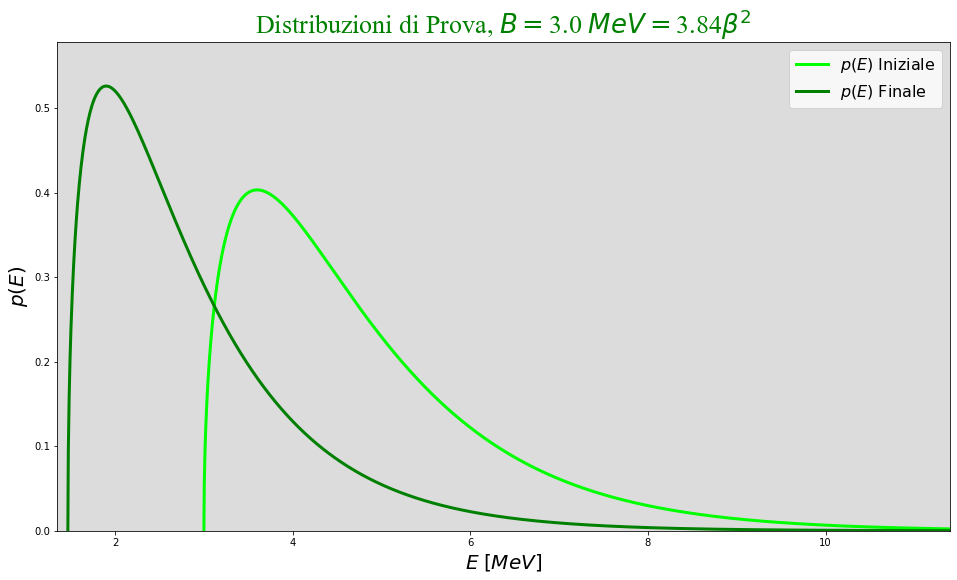

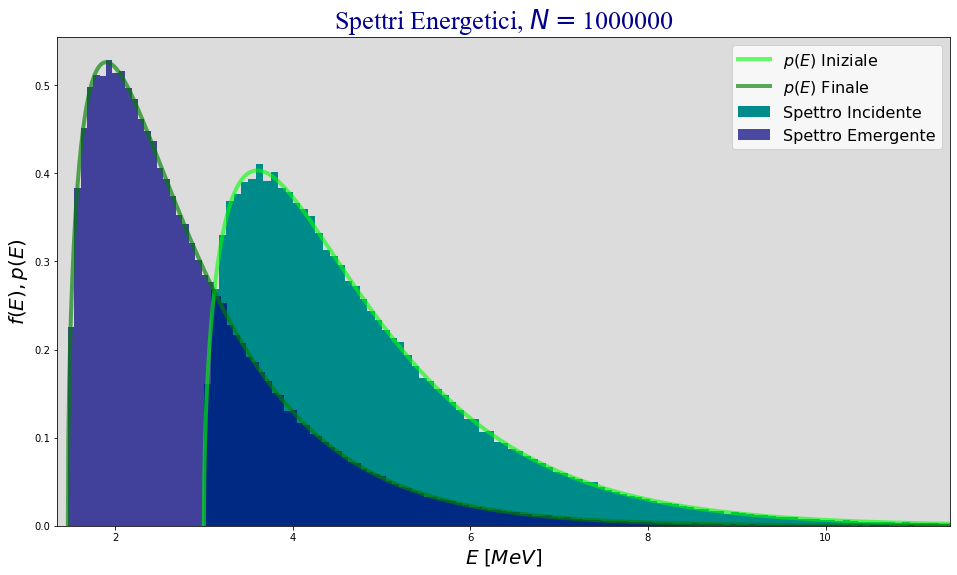

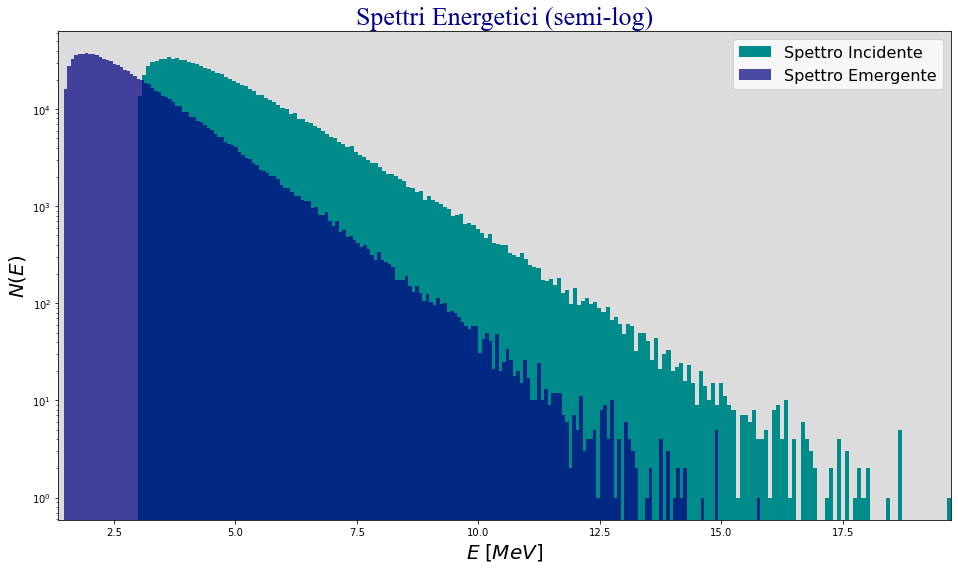

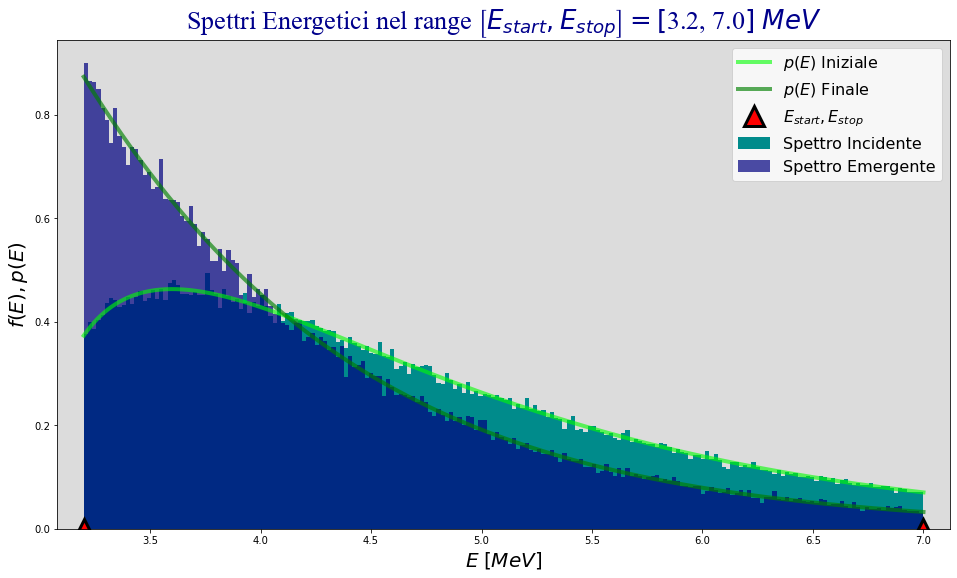

Tempo di esecuzione: 33.0018 s


In [4]:
t=time()                                                        #p(E) e P(y) sono rappresentate in tre grafici (1, 2, 3):
                                                                #nel primo si confrontano le distribuzioni teoriche dei due
font1={'family':'times new roman','color':'darkblue','size':26} #spettri; nel secondo vengono aggiunti gli istogrammi
                                                                #effettivi; il terzo è analogo al secondo, ma è mostrato
Xi_12= np.linspace(B, B + 7.*T, 2000)                           #solo il range di energie [E_start, E_stop]. Visto che le
Xf_1 = np.linspace(ϕ( max(B, β**2./4.) ), B + 7.*T, 2000)       #due funzioni, nei tre casi, hanno diversi domini di rappre-
Xf_2 = np.linspace(max(ϕ(B), 0.), B + 7.*T, 2000)               #sentazione, sono definiti diversi array con cui graficarle:
Xi_3 = np.linspace(max(B, E_start), E_stop, 2000)               #Xi_12 è usato per graficare la pdf iniziale nei grafici
Xf_3 = np.linspace(max(ϕ(B), E_start), E_stop, 2000)            #(1,2); Xf_1 per la pdf finale in (1), comprese quelle nega-
                                                                #tive (che hanno un senso puramente matematico). Così a
M = max(P_vec(Xf_1))                                            #seguire per tutti gli altri. Xf_1 parte dal valor minimo 
                                                                #raggiunto da φ sul campione delle E iniziali, cioè da φ(B)
                                                                #se B > β²/4 (il minimo analitico), e da tale minimo se
                                                                #B < β²/4. Allo stesso modo, gli intervalli per gli altri 
                                                                #array sono scelti in corrispondenza dei valori dove la 
                                                                #rispettiva funzione è non nulla. Dopo B + 7T si assume 
                                                                #trascurabile p(E) - e ovviamente anche P(y).
plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Distribuzioni di Prova, $B=$'+str(round(B,2))+' $MeV=$'+str(round(B/β**2.,2))+r'$\beta^2$',fontdict=font1,c='g')

plt.plot(Xi_12, p_vec(Xi_12), c='lime',  lw=3, label=r'$p(E)$ Iniziale')
plt.plot(Xf_1, P_vec(Xf_1), c='green', lw=3, label=r'$p(E)$ Finale')
if B <= β**2.:
    plt.plot([0., 0.], [0., M*1.1], '--b', label=r'$E_{em}=0$')
if B <= β**2./4.:
    plt.plot([-β**2./4., -β**2./4.], [0., M*1.1], '--r', label=r'$E_{em}=-\beta^2/4$')

plt.xlabel('$E\; [MeV]$', size=20)
plt.ylabel('$p(E)$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(ϕ( max(B, β**2./4.) ) - T/10., B + 7.*T)
plt.ylim(0., M*1.1)
plt.show()


plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Spettri Energetici, $N=$'+str(N), fontdict=font1)

plt.hist(Sample0, bins=200, density=True, color='darkcyan', label='Spettro Incidente')
plt.hist(Sample1, bins=200, density=True, color='navy', alpha=0.7, label='Spettro Emergente')
plt.plot(Xi_12, p_vec(Xi_12),   c='lime',  lw=4, alpha=0.60, label=r'$p(E)$ Iniziale')
plt.plot(Xf_2,  k1*P_vec(Xf_2), c='green', lw=4, alpha=0.65, label=r'$p(E)$ Finale')

plt.xlabel('$E\; [MeV]$', size=20)
plt.ylabel('$f(E), p(E)$', size=20)
plt.legend(fontsize=16,loc='upper right')
plt.xlim(max(ϕ(B), 0.) - T/10., B + 7.*T)
plt.show()


plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Spettri Energetici (semi-log)', fontdict=font1)

plt.hist(Sample0, bins=200, density=False, color='darkcyan', label='Spettro Incidente')
plt.hist(Sample1, bins=200, density=False, color='navy', alpha=0.7, label='Spettro Emergente')

plt.xlabel('$E\; [MeV]$', size=20)
plt.ylabel('$N(E)$', size=20)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(max(ϕ(B), 0.) - T/10., max(Sample0))
plt.yscale('log')
plt.show()


plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'Spettri Energetici nel range $\left[E_{start},E_{stop}\right]=[$'+str(round(E_start,2))+', '+str(round(E_stop,2))+'$]\;MeV$',
          fontdict=font1)

if E_stop <= ϕ(B):
    plt.plot([E_start,E_stop], [0,0], '^ r', ms=20, mec='k', mew=3, label='$E_{start},E_{stop}$\nSpettri fuori range')
    plt.ylim(0,1)
elif ϕ(B) < E_stop <= B:
    plt.hist(Sample1, range=(E_start,E_stop), bins=200, density=True, color='navy', label='Spettro Emergente')
    plt.plot(Xf_3, k2*P_vec(Xf_3), c='green', lw=4, alpha=0.65, label='$p(E)$ Finale')
    plt.plot([E_start,E_stop], [0,0], '^ r', ms=20, mec='k', mew=3, label=r'$E_{start}, E_{stop}$')
else:
    plt.hist(Sample0, range=(E_start,E_stop), bins=200, density=True, color='darkcyan', label='Spettro Incidente')
    plt.plot(Xi_3, h*p_vec(Xi_3), c='lime',  lw=4, alpha=0.60, label='$p(E)$ Iniziale')
    plt.hist(Sample1, range=(E_start,E_stop), bins=200, density=True, color='navy', alpha=0.7, label='Spettro Emergente')
    plt.plot(Xf_3, k2*P_vec(Xf_3), c='green', lw=4, alpha=0.65, label='$p(E)$ Finale')
    plt.plot([E_start,E_stop], [0,0], '^ r', ms=20, mec='k', mew=3, label=r'$E_{start}, E_{stop}$')

plt.xlabel('$E\; [MeV]$', size=20)
plt.ylabel('$f(E), p(E)$',size=20)
plt.legend(fontsize=16)
plt.xlim(E_start - T/10., E_stop + T/10.)
plt.show()

t=time()-t
print('Tempo di esecuzione:',round(t,4),'s')